# Eigenvalue problems

In this notebook we show that quantum mechanics can be easy! Well, at least this sample problem. Here we solve Schrödinger equation in a symmetrical pit. This is a well-known eigenvalue problem for which we will seek the wave function $\Psi$ that contains all the information about system dynamics. The problem takes the form:

$$
-\frac{\hbar^2}{2m}\frac{\partial^2\Psi}{\partial{}x^2}+\Psi{}U=E\Psi\implies
\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial{}x^2}+U\right]\Psi=E\Psi
$$

To solve it we provide function `symmetric_pit1d` which computes the approximate version of the operator acting over $\Psi$.

In [1]:
function [x, M] = symmetric_pit1d(m, L, N)
    # Plank constant h/2pi [J.s].
    hbar = 1.05457e-34;
    
    # Problem multiplier.
    p = -hbar^2 / (2 * m);
    
    # Space discrete step [m].
    dx = L / N;
    
    # Discretize space.
    x = linspace(-dx, L + dx, N)';
    
    # Pit potential [J].
    U = zeros(N, 1);
    
    # Boundary potential is `infinite`.
    U(1) = U(end) = 1.0e+300;
    
    # Create matrix.
    Ld = diag(-p / dx^2 * ones(N-1, 1), -1);
    Ud = diag(-p / dx^2 * ones(N-1, 1), +1);
    Md = diag([U + 2 * p / dx^2], 0);
    M = sparse(Ld + Md + Ud);
endfunction

Now we simply use this function to generate the numerical approximation to the QM operator and with help of `eigs` we retrieve the first 3 eigenvectors close to zero.

In [2]:
# Electron mass [kg].
m = 9.10938e-31;

# Pit width [m].
L = 1.0e-06;

# Create problem matrix.
[x, M] = symmetric_pit1d(1000 * m, L, 5000);
[V, d] = eigs(M, 3, 0.0);

To make $\Psi$ interpretable as a probability density we take the normalized square of its value.

In [3]:
v1 = -V(:, 1).^2 / trapz(V(:, 1).^2, x);
v2 = -V(:, 2).^2 / trapz(V(:, 2).^2, x);
v3 = -V(:, 3).^2 / trapz(V(:, 3).^2, x);

Finally we can get to the visualization of solution.

In [4]:
graphics_toolkit("gnuplot");


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


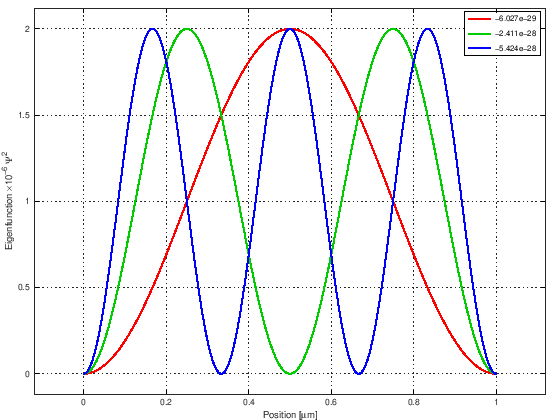

In [5]:

figure();
plot(x * 1.0e+06, v1 * 1.0e-06, 'color', [1.0, 0.0, 0.0], 'linewidth', 4); hold on;
plot(x * 1.0e+06, v2 * 1.0e-06, 'color', [0.0, 0.8, 0.0], 'linewidth', 4); hold on;
plot(x * 1.0e+06, v3 * 1.0e-06, 'color', [0.0, 0.0, 1.0], 'linewidth', 4); hold on;
xlabel('Position [\mu{}m]')
ylabel('Eigenfunction \times{}10^{-6} \Psi^2');
grid on; set(gca, 'GridLineStyle', ':');

l1 = mat2str(d(1, 1), 4);
l2 = mat2str(d(2, 2), 4);
l3 = mat2str(d(3, 3), 4);
legend(l1, l2, l3);

xlim([-0.12, 1.12]);
ylim([-0.12, 2.12]);